<a href="https://colab.research.google.com/github/micah-shull/Data_Analysis/blob/main/DataClean_0_missingValues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1: Data Cleaning and Preprocessing

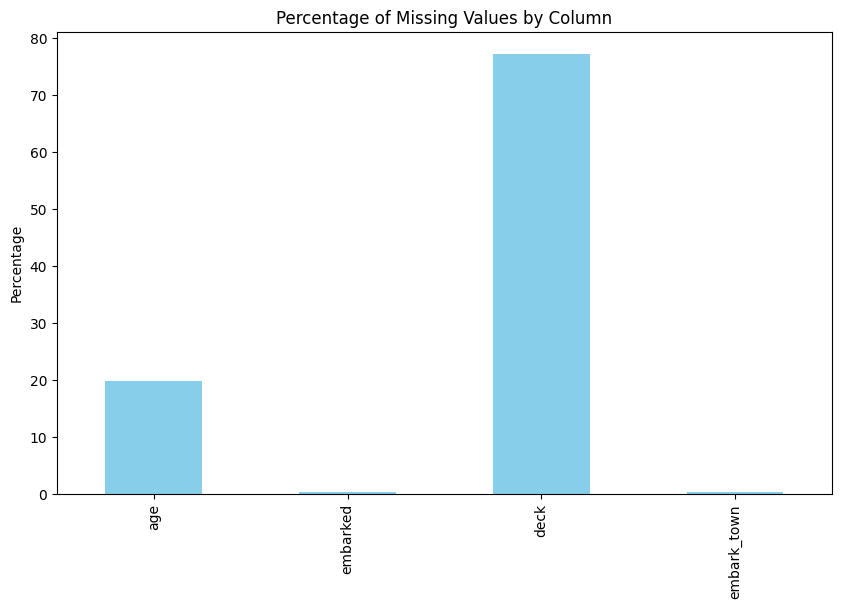

nunmber of missing values 869


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Filter out columns with no missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Create a bar plot of missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.show()

print('nunmber of missing values', df.isna().sum().sum())

#Missing Values

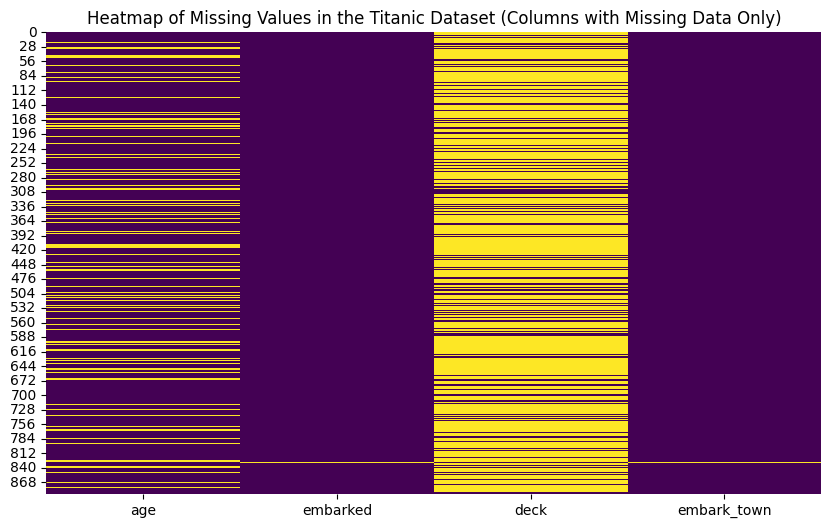

In [ ]:
# Visualize missing values with a heatmap for columns with missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df[missing_percentage.index].isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in the Titanic Dataset (Columns with Missing Data Only)')
plt.show()

## Handle missing values
- For simplicity, we'll fill missing values with the median for numerical columns and the mode for categorical columns

In [ ]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Fill missing 'age' with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing 'embarked' with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Add 'Unknown' to categories of 'deck' and fill missing values with 'Unknown'
df['deck'] = df['deck'].cat.add_categories('Unknown').fillna('Unknown')

# Fill missing 'embark_town' with mode
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Fill missing 'who', 'adult_male', 'alive' with mode
df['who'].fillna(df['who'].mode()[0], inplace=True)
df['adult_male'].fillna(df['adult_male'].mode()[0], inplace=True)
df['alive'].fillna(df['alive'].mode()[0], inplace=True)
print('nunmber of missing values', df.isna().sum().sum())


nunmber of missing values 0


### 1. **K-Nearest Neighbors (KNN) Imputation**
KNN imputation uses the k-nearest neighbors to impute the missing values. It fills in the missing values by finding the most similar observations in the dataset.


In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import seaborn as sns
import numpy as np

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Impute numerical columns using KNNImputer
numerical_cols = df.select_dtypes(include=[np.number]).columns
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df[numerical_cols])
df_imputed = pd.DataFrame(df_imputed, columns=numerical_cols)

# Replace the original numerical columns with imputed columns
df[numerical_cols] = df_imputed

# Impute categorical columns with mode
categorical_cols = df.select_dtypes(include=[object, 'category']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check the results
print('Number of missing values:', df.isna().sum().sum())


Number of missing values: 0


### 2. **Multiple Imputation**
Multiple imputation involves creating several different plausible datasets by imputing the missing values multiple times, analyzing each dataset separately, and then combining the results. This method accounts for the uncertainty in the missing data.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import seaborn as sns
import numpy as np

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Impute numerical columns using IterativeImputer
numerical_cols = df.select_dtypes(include=[np.number]).columns
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = imputer.fit_transform(df[numerical_cols])
df_imputed = pd.DataFrame(df_imputed, columns=numerical_cols)

# Replace the original numerical columns with imputed columns
df[numerical_cols] = df_imputed

# Impute categorical columns with mode
categorical_cols = df.select_dtypes(include=[object, 'category']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check the results
print('Number of missing values:', df.isna().sum().sum())


Number of missing values: 0


### 3. **Random Forest for Missing Value Imputation**
Predictive modeling involves using machine learning algorithms to predict the missing values based on other available data. For example, you can use regression models to predict missing numerical values or classification models for categorical values.





In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import numpy as np

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Impute numerical columns using Random Forest
# Define the target and predictor variables for 'age'
age_train = df_encoded[df_encoded['age'].notnull()]
age_test = df_encoded[df_encoded['age'].isnull()]

# Define the predictor and target variables
X_age_train = age_train.drop(columns=['age'])
y_age_train = age_train['age']
X_age_test = age_test.drop(columns=['age'])

# Ensure that both train and test sets have the same columns
X_age_test = X_age_test[X_age_train.columns]

# Train the model
age_model = RandomForestRegressor(n_estimators=100, random_state=0)
age_model.fit(X_age_train, y_age_train)

# Predict the missing values for 'age'
age_predictions = age_model.predict(X_age_test)

# Fill the missing values in the original dataframe
df.loc[df['age'].isnull(), 'age'] = age_predictions

# Impute other numerical columns (if any)
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop('age')
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = imputer.fit_transform(df[numerical_cols])
df_imputed = pd.DataFrame(df_imputed, columns=numerical_cols)

# Replace the original numerical columns with imputed columns
df[numerical_cols] = df_imputed

# Impute categorical columns with mode
categorical_cols = df.select_dtypes(include=[object, 'category']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check the results
print('Number of missing values:', df.isna().sum().sum())


Number of missing values: 0


### 5. **Deep Learning Methods**
Autoencoders and other deep learning models can be used to impute missing values, especially for complex datasets. These models learn the underlying structure of the data to generate plausible values for missing entries.

These advanced strategies can be more effective than simple imputation methods (like filling with mean or mode) because they consider the relationships and patterns in the data. The choice of method depends on the nature of the data, the missingness mechanism, and the specific requirements of your analysis.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Impute categorical columns with mode before autoencoder
categorical_cols = df.select_dtypes(include=[object, 'category']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Prepare the data for autoencoder
input_dim = df_encoded.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation="relu")(input_layer)
encoder = Dense(64, activation="relu")(encoder)
decoder = Dense(128, activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Initial imputation to handle missing values for numerical columns
df_encoded_filled = df_encoded.fillna(df_encoded.mean())

# Ensure the data type is float32 for TensorFlow compatibility
df_encoded_filled = df_encoded_filled.astype(np.float32)

# Train the autoencoder
autoencoder.fit(df_encoded_filled, df_encoded_filled, epochs=50, batch_size=32, shuffle=True)

# Impute missing values using the autoencoder
encoded_data = autoencoder.predict(df_encoded_filled)
df_imputed = pd.DataFrame(encoded_data, columns=df_encoded.columns)

# Replace the original numerical columns with imputed columns
df[df_imputed.columns] = df_imputed

# Check the results
print('Number of missing values:', df.isna().sum().sum())

Epoch 1/50
28/28 [==============================] - 2s 5ms/step - loss: 185.5617
Epoch 2/50
28/28 [==============================] - 0s 5ms/step - loss: 184.9944
Epoch 3/50
28/28 [==============================] - 0s 6ms/step - loss: 184.9805
Epoch 4/50
28/28 [==============================] - 0s 8ms/step - loss: 184.9735
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 184.9634
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 184.9483
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 184.9354
Epoch 8/50
28/28 [==============================] - 0s 2ms/step - loss: 184.9258
Epoch 9/50
28/28 [==============================] - 0s 2ms/step - loss: 184.9177
Epoch 10/50
28/28 [==============================] - 0s 2ms/step - loss: 184.9089
Epoch 11/50
28/28 [==============================] - 0s 2ms/step - loss: 184.9018
Epoch 12/50
28/28 [==============================] - 0s 2ms/step - loss: 184.8969
Epoch 13/50
28/28 [======